<a href="https://colab.research.google.com/github/dung18520632/Deep_Learning-Python-Basics/blob/main/Convolution_Step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
def zero_pad(X, pad):
  X_pad=np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)),'constant',constant_values=(0,0))
  return X_pad


x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1,1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


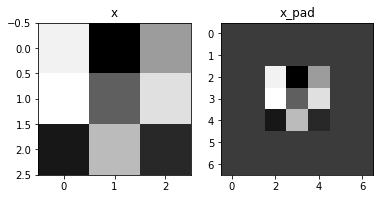

In [3]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [4]:
def conv_single_step(a_slice_prev, W, b):
  Z=np.multiply(a_slice_prev,W)+b
  Z=np.sum(Z)
  return Z

In [5]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -23.16021220252078


In [29]:
def conv_forward(A_prev, W, b, hparameters):
  m,n_H_prev,n_W_prev,n_c=A_prev.shape
  #print(A_prev.shape)
  f,f,n_C_prev,n_C=W.shape
  stride=hparameters["stride"]
  pad=hparameters["pad"]
  n_H=int((n_H_prev-f+2*pad)/stride+1)
  n_W=int((n_W_prev-f+2*pad)/stride+1)
  Z = np.zeros((m, n_H, n_W, n_C))
  A_prev_pad=zero_pad(A_prev,pad)
  for i in range(m): 
    a_prev_pad=A_prev_pad[i,:,:,:]
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):
          vert_start=h
          vert_end=vert_start+f
          horiz_start=w
          horiz_end=horiz_start+f
          a_slice_prev=a_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:]
          Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:, :, :, c], b[:, :, :, c]) 
    
    # Making sure your output shape is correct
  assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
  cache = (A_prev, W, b, hparameters)
    
  return Z, cache





In [30]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 1}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =", np.mean(Z))
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Z's mean = 0.15585932488906465
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


In [41]:
def pool_forward(A_prev, hparameters, mode = "max"):
  m,n_H_prev,n_W_prev,n_C_prev=A_prev.shape
  f=hparameters["f"]
  stride=hparameters["stride"]
  n_H=int((n_H_prev-f)/stride+1)
  n_W=int((n_W_prev-f)/stride+1)
  n_C=n_C_prev
  A=np.zeros((m,n_H,n_W,n_C))
  for i in range(m):
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):
          h_start=h
          h_end=h_start+f
          w_start=w
          w_end=w_start+f
          a_prev_slice=A_prev[i,:,:,c]
          if mode=="max":
            A[i,h,w,c]=np.max(a_prev_slice[h_start:h_end,w_start:w_end])
          elif mode=="average":
            A[i,h,w,c]=np.mean(a_prev_slice[h_start:h_end,w_start:w_end])
  cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
  assert(A.shape == (m, n_H, n_W, n_C))
    
  return A, cache




In [42]:

np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride" : 1, "f": 4}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)

0
1
2
0
1
2
mode = max
A = [[[[1.74481176 1.6924546  2.10025514]]]


 [[[1.19891788 1.51981682 2.18557541]]]]

0
1
2
0
1
2
mode = average
A = [[[[-0.09498456  0.11180064 -0.14263511]]]


 [[[-0.09525108  0.28325018  0.33035185]]]]


In [47]:
def create_mask_from_window(x):
  mask=(x==np.max(x))
  return mask

In [48]:
np.random.seed(1)
x = np.random.randn(2,3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]


In [56]:
def distribute_value(dz, shape):
  (n_H,n_W)=shape
  average=dz/(n_H*n_W)
  a=np.ones((n_H,n_W))*average
  return a


In [57]:
a = distribute_value(2, (2,2))
print('distributed value =', a)

distributed value = [[0.5 0.5]
 [0.5 0.5]]
